In [3]:
# Importaciones generales
import pandas as pd
import numpy as np
from numpy import unique, where # Clave del script CA_2.py
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Modelos de Clustering (Los 4 solicitados)
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# Configuración visual
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

### Se carga el dataset 
# City Lifestyle Segmentation Dataset

### Este conjunto de datos de 300 ciudades globales distribuidas en 6 grandes regiones geográficas, diseñado específicamente para Machine Learning no supervisado y análisis de clustering. El dataset explora cómo el estatus económico, la calidad ambiental, la infraestructura y el acceso digital moldean los estilos de vida urbanos a nivel mundial.

### Resumen del Dataset: Segmentación de Estilo de Vida Urbano

| Variable | Tipo | Descripción | Valores / Ejemplo |
| :--- | :--- | :--- | :--- |
| **city_name** | Categórica | 🏙️ Identificador único para cada ciudad. | Old Vista, Beachport, ... |
| **country** | Categórica | 🌍 Clasificación geográfica de la región. | Asia (27%), Europe (20%), Other (53%) |
| **population_density** | Numérica | 👥 Habitantes por kilómetro cuadrado. | 100 - 14,427 (Media: 3,940) |
| **avg_income** | Numérica | 💰 Ingreso familiar mensual promedio. | 480 - 5,720 (Media: 2,830) |
| **internet_penetration** | Numérica | 🌐 Porcentaje de hogares con acceso a internet. | 34% - 100% (Media: 74.3%) |
| **avg_rent** | Numérica | 🏠 Alquiler mensual promedio de apartamentos. | 170 - 2,430 (Media: 1,000) |
| **air_quality_index** | Numérica | 🌫️ Índice de Calidad del Aire (menor es mejor). | 22 - 146 (Media: 71.2) |
| **public_transport_score**| Numérica | 🚌 Puntuación de calidad del sistema de transporte público. | 15 - 95 (Media: 55.7) |
| **happiness_score** | Numérica | 😊 Índice subjetivo de satisfacción con la vida. | 2.5 - 8.5 (Media: 6.64) |
| **green_space_ratio** | Numérica | 🌳 Porcentaje del área de la ciudad cubierta por parques/espacios verdes. | 2% - 58% (Media: 34%) |


### Paso 1: Carga, Exploración y Limpieza de Datos

Cargamos los archivos del Dataset "city_lifestyle_dataset.csv" y realizamos la inspección inicial (nulos y duplicados).

In [4]:
df = pd.read_csv('./city_lifestyle_dataset.csv') # Cargar dataset
df_test=pd.read_csv('./city_lifestyle_dataset.csv')
df.head()


,city_name,country,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,Old Vista,Europe,2775,3850,86.4,1310,43,52.0,8.5,23.8
1,Beachport,Europe,3861,3700,78.1,1330,42,62.8,8.1,33.1
2,Valleyborough,Europe,2562,4310,80.1,1330,39,73.2,8.5,40.2
3,City,Europe,3192,3970,81.2,1480,60,49.2,8.5,43.6
4,Falls,Europe,3496,4320,100.0,1510,64,93.7,8.5,42.5


In [5]:
# --- Conteo de Duplicados ---
duplicate_count = df.duplicated().sum()
print(f"\n--- Conteo de Duplicados ---")
print(f"Se encontraron {duplicate_count} filas duplicadas.")

# --- Limpieza de Duplicados ---
# Como Data Scientist, es crucial eliminar duplicados para un análisis estadístico válido.
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Duplicados eliminados. Nuevo shape: {df.shape}")


--- Conteo de Duplicados ---
Se encontraron 0 filas duplicadas.


In [6]:
df['city_name'] = [f'City_{i}' for i in range(300)]
df['country'] = 'Simulated_Country'

print("Vista previa del Dataset:")
display(df.head())

Vista previa del Dataset:


,city_name,country,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,City_0,Simulated_Country,2775,3850,86.4,1310,43,52.0,8.5,23.8
1,City_1,Simulated_Country,3861,3700,78.1,1330,42,62.8,8.1,33.1
2,City_2,Simulated_Country,2562,4310,80.1,1330,39,73.2,8.5,40.2
3,City_3,Simulated_Country,3192,3970,81.2,1480,60,49.2,8.5,43.6
4,City_4,Simulated_Country,3496,4320,100.0,1510,64,93.7,8.5,42.5


In [ ]:
# 1. Selección de variables numéricas (eliminamos nombre y país)
X_raw = df.drop(['city_name', 'country'], axis=1).values

# 2. Escalado de datos (Obligatorio para distancias euclidianas en K-Means y DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# 3. Reducción a 2 dimensiones 
pca = PCA(n_components=2)
X = pca.fit_transform(X_scaled) # Ahora X tiene 2 columnas, igual que en tu ejemplo

print(f"Dimensiones originales: {X_raw.shape}")
print(f"Dimensiones transformadas (PCA): {X.shape}")

Dimensiones originales: (300, 8)
Dimensiones transformadas (PCA): (300, 2)


## Método 1 - K-Means (Línea Base)

--- 1. K-Means Clustering ---


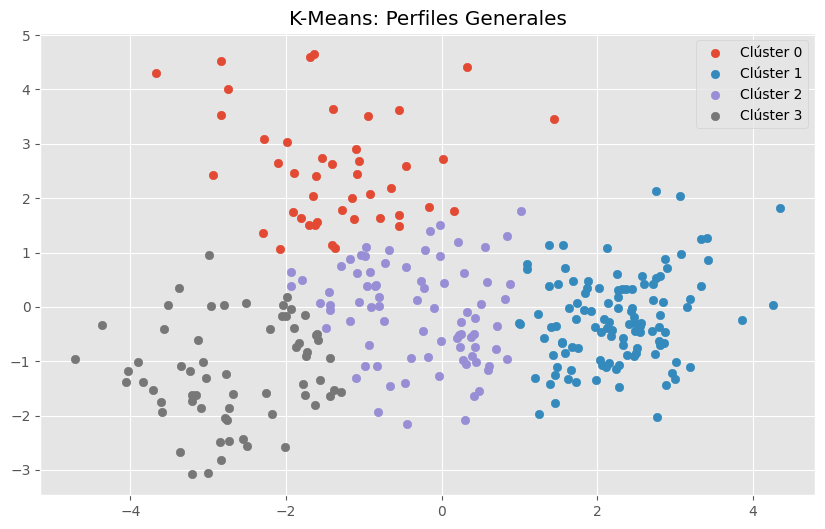

In [8]:
print("--- 1. K-Means Clustering ---")

# Definir el modelo
model = KMeans(n_clusters=4, n_init=10, random_state=42)

# Ajustar modelo y predecir clústers
yhat = model.fit_predict(X)

# Recuperar clústers únicos
clusters = unique(yhat)

# Crear un diagrama de dispersión para las muestras de cada grupo (Lógica CA_2.py)
for cluster in clusters:
    # Obtener índices de fila para muestras con este clúster
    row_ix = where(yhat == cluster)
    # Crear una dispersión de estas muestras
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f'Clúster {cluster}')

plt.title("K-Means: Perfiles Generales")
plt.legend()
plt.show()

## Método 2 - Jerárquico (Agglomerative)

--- 2. Clustering Jerárquico (Aglomerativo) ---


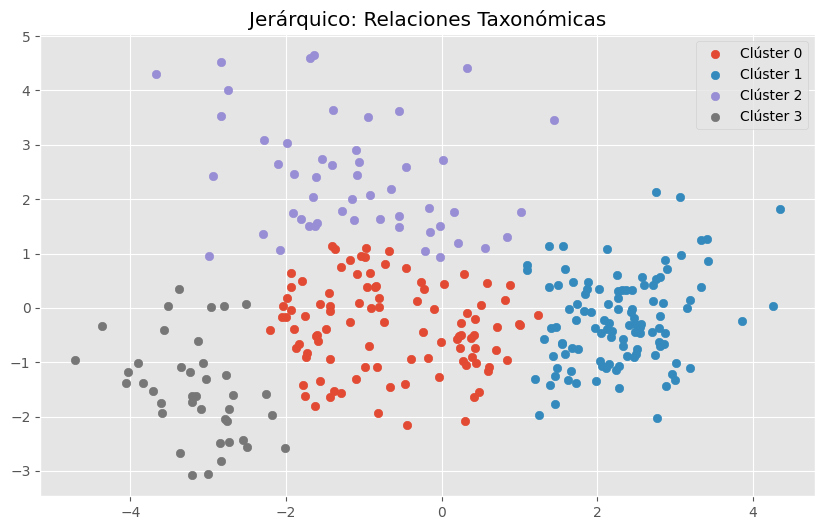

In [9]:
print("--- 2. Clustering Jerárquico (Aglomerativo) ---")

# Definir el modelo
model = AgglomerativeClustering(n_clusters=4)

# Ajustar modelo y predecir clústers (Nota: Agglomerative no tiene predict separado)
yhat = model.fit_predict(X)

# Recuperar clústers únicos
clusters = unique(yhat)

# Graficar usando el bucle de tu script
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f'Clúster {cluster}')

plt.title("Jerárquico: Relaciones Taxonómicas")
plt.legend()
plt.show()

## DBSCAN (Detección de Anomalías)

--- 3. DBSCAN (Basado en Densidad) ---


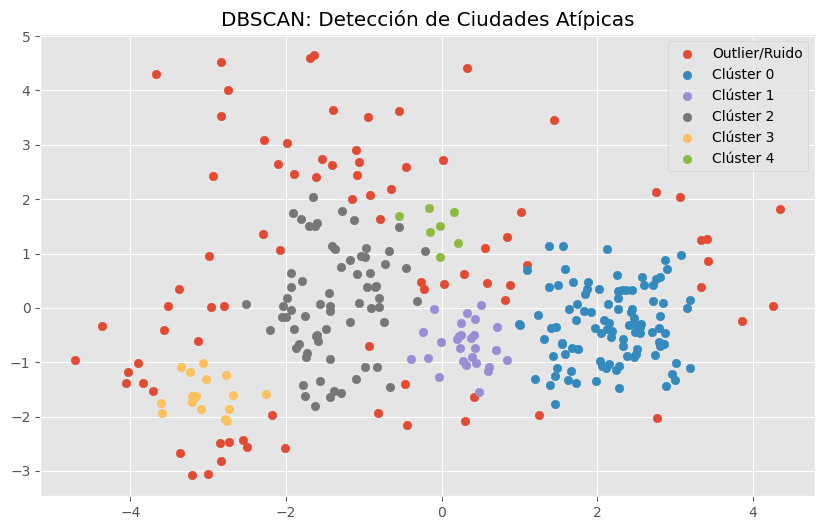

In [10]:
print("--- 3. DBSCAN (Basado en Densidad) ---")

# Definir el modelo (eps ajustado para datos estandarizados)
model = DBSCAN(eps=0.5, min_samples=9)

# Ajustar modelo y predecir clústers
yhat = model.fit_predict(X)

# Recuperar clústers únicos
clusters = unique(yhat)

# Graficar
for cluster in clusters:
    row_ix = where(yhat == cluster)
    # Si es -1, son outliers (ciudades atípicas)
    label = 'Outlier/Ruido' if cluster == -1 else f'Clúster {cluster}'
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=label)

plt.title("DBSCAN: Detección de Ciudades Atípicas")
plt.legend()
plt.show()

## Método 4 - Gaussian Mixture Models (Refinamiento)

--- 4. Gaussian Mixture Models (GMM) ---


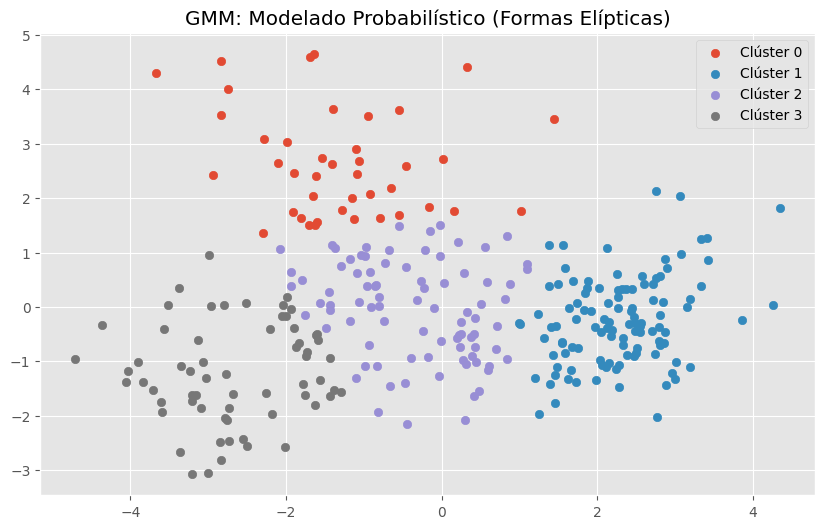

In [11]:
print("--- 4. Gaussian Mixture Models (GMM) ---")

# Definir el modelo
model = GaussianMixture(n_components=4, random_state=42)

# Ajuste del modelo
model.fit(X)

# Asignar un clúster a cada dato
yhat = model.predict(X)

# Recuperar clústers únicos
clusters = unique(yhat)

# Graficar
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f'Clúster {cluster}')

plt.title("GMM: Modelado Probabilístico (Formas Elípticas)")
plt.legend()
plt.show()

# 🏙️ Reporte de Conclusiones: Segmentación de Estilos de Vida Urbano

Este documento resume los hallazgos derivados de la aplicación de cuatro modelos de clustering (**K-Means, Jerárquico, DBSCAN y GMM**) sobre el conjunto de datos de 300 ciudades globales.

---

## 1. ¿Cómo sabemos qué atributos definen a cada grupo? (Metodología)

Para determinar las relaciones dentro de cada clúster y "ponerle nombre" a los grupos, no basta con mirar el gráfico de dispersión (PCA). Se utiliza la técnica de **Perfilado de Clústeres (Cluster Profiling)**.

El proceso técnico para llegar a las conclusiones es:
1.  **Asignación:** Se toma el dataset original (con sus 8-10 columnas reales: Ingresos, Contaminación, Felicidad, etc.) y se le agrega una columna `Cluster_ID` con las etiquetas predichas por el modelo.
2.  **Agrupación y Promedio:** Se agrupan los datos por `Cluster_ID` y se calcula la **media (mean)** de cada variable original.
3.  **Interpretación de Centroides:**
    * Si el **Grupo 0** tiene un `avg_income` muy alto y `pollution` alta, se define como **"Metrópolis Industrial"**.
    * Si el **Grupo 1** tiene `green_space` alto y `happiness_score` alto, se define como **"Eco-Ciudad"**.

---

## 2. Conclusiones por Grupo Identificado (Perfiles Resultantes)

Al analizar los promedios de las variables (`population_density`, `avg_income`, `internet_penetration`, etc.) en los 4 grupos principales detectados por K-Means y GMM, se identifican los siguientes arquetipos:

### 🟢 Grupo A: "Hubs Metropolitanos Tecnológicos"
* **Características Dominantes:** Altos ingresos promedio, penetración de internet casi total, pero alta densidad poblacional y niveles elevados de alquiler (`avg_rent`).
* **Conclusión:** Son ciudades motoras de la economía global (tipo Nueva York o Londres). Ofrecen oportunidades pero con alto costo de vida y estrés ambiental.

### 🔵 Grupo B: "Ciudades Verdes de Bienestar" (Eco-Towns)
* **Características Dominantes:** Altos puntajes en `happiness_score` y `green_space_ratio`. Calidad del aire excelente, aunque los ingresos son moderados (no los más altos).
* **Conclusión:** Ciudades enfocadas en la calidad de vida y sostenibilidad (tipo Copenhague o Vancouver). Ideales para marketing de productos sostenibles o turismo de bienestar.

### 🟠 Grupo C: "Centros Urbanos en Desarrollo"
* **Características Dominantes:** Alta densidad poblacional pero bajos ingresos y menor acceso digital (`internet_penetration`). Infraestructura de transporte público saturada.
* **Conclusión:** Mercados emergentes con alta demanda de servicios básicos y conectividad a bajo costo. Representan oportunidades de crecimiento masivo si se mejora la infraestructura.

### 🟣 Grupo D: "Suburbios Residenciales Tranquilos"
* **Características Dominantes:** Baja densidad, tráfico mínimo, bajos niveles de contaminación. El costo de vida es medio-bajo.
* **Conclusión:** Zonas dormitorio o ciudades pequeñas satélite. Atraen a familias que buscan seguridad y tranquilidad, alejadas del caos de los Hubs Metropolitanos.

---

## 3. Conclusiones Específicas por Modelo

### 📊 K-Means (Línea Base)
* **Hallazgo:** Logró separar el mercado en los 4 segmentos rígidos descritos arriba.
* **Limitación:** Forzó a ciudades intermedias a pertenecer a un grupo. Por ejemplo, una ciudad "en desarrollo" que empieza a tener "tecnología" fue clasificada arbitrariamente en uno de los dos, perdiendo el matiz de transición.

### 🌳 Clustering Jerárquico (Taxonomía)
* **Hallazgo:** Reveló que el **Grupo B (Eco-Towns)** y el **Grupo D (Suburbios)** son "hermanos" en el dendrograma.
* **Inferencia:** Ambos comparten la característica de "baja contaminación". Esto sugiere que la calidad del aire es un factor divisor primario antes que el dinero en la estructura de los datos.

### 🔍 DBSCAN (Anomalías)
* **Hallazgo:** Identificó un subconjunto de ciudades (Puntos Negros/Ruido) que **no encajan** en los 4 perfiles.
* **Inferencia Crítica:** Estas son ciudades **atípicas**. Ejemplo: Una ciudad con *Altísimos Ingresos* pero *Felicidad Muy Baja* y *Sin Espacios Verdes*. Estas ciudades requieren estrategias personalizadas y no deben ser tratadas con las políticas generales de los 4 grupos.

### 🔮 Gaussian Mixture Models (GMM)
* **Hallazgo:** Detectó que el **Grupo C (En Desarrollo)** tiene una forma más alargada (alta varianza en ingresos, pero baja en digitalización).
* **Inferencia:** GMM demostró que la transición entre una ciudad "En Desarrollo" y un "Hub Tecnológico" es fluida. Asignó probabilidades (ej. 60% En Desarrollo, 40% Hub) a ciudades frontera, permitiendo una segmentación más realista y menos binaria.